<a href="https://colab.research.google.com/github/AstridSerruto/Projects/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

In 2019, credit card fraud losses amounted to $28.65 billion worldwide. Companies such as VISA and DISCOVER, are looking to Machine Learning solutions to prevent these losses. Efficiency and accurate predictions, are just some of benifits Machine Learning provides when used.

In this model wil used methods such as:

    Random Forest Classifiers
    Logistic Regression
    Neural Networks

Import packages 

In [60]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense, Dropout
from tensorflow.keras.optimizers import Adam

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Retrieving Data

This project uses data from the “Credit Card Fraud Detection” dataset from kaggle.com: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud. 

Because credit card fraud relies on processing sensitive data, the original data CAN NOT be displayed. Thus 28 features (V1 — V28) are masked using Principal Component Analysis (PCA). Only two variables were not transformed:

    “Time” which represents the seconds elapsed between the current transaction and the first transaction in the dataset
    
    “Amount” which represents the total transaction value.

The response variable, “Class”, has two values:

    1 for fraudulent cases
    0 for non-fraudulent cases

In [32]:
from google.colab import drive
drive.mount('/content/drive')
	
df = pd.read_csv('/content/drive/My Drive/Datasets/Kaggle Data Sets/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploring de Data

In [33]:
print(df.head(),"\n"*3)

df.shape


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

(284807, 31)

In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset contains 284807 rows and 31 columns, 28 of them is the output of PCA(V1 to V28) and values of amount and time.

The response variable is class: 0 = no fraud, 1 = fraud

In [35]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

In [36]:
fraud.shape

(492, 31)

In [37]:
normal.shape

(284315, 31)

0    284315
1       492
Name: Class, dtype: int64

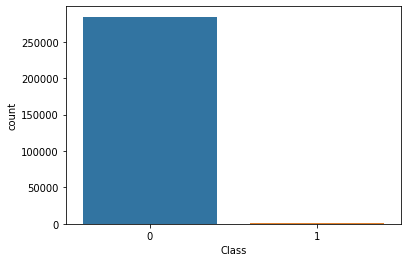

In [38]:
sns.countplot(x=df['Class'])
df['Class'].value_counts()

The dataset is highly imbalanced, the majority of data is of class 0, 284315 rows and 492 rows class 1. This is problem, because the model needs to train on both classes.

We will plot the distribution of amount and time over the two classes.

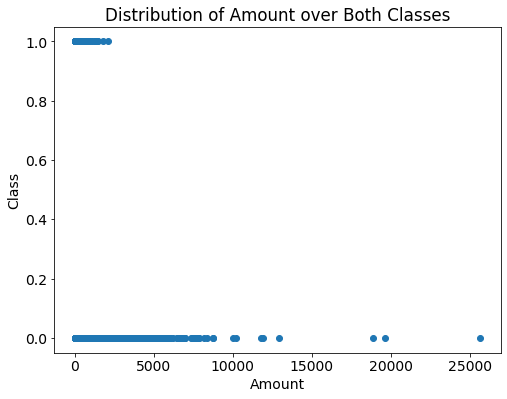

In [39]:
# Adjusting figuresize, and fontsize
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 14}
plt.rc('font', **font)

# Adding titles to the plots and axes
plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

# Plotting the Amount column vs. Class Column
plt.scatter(df["Amount"],df["Class"])


In this plot we can see that the fraudulent entries haver lower amount values as opposed to non-fraudulent ones. We can also see an uneven distribution of non-fraudulent values, as there are larger intervals between higher and lower values.

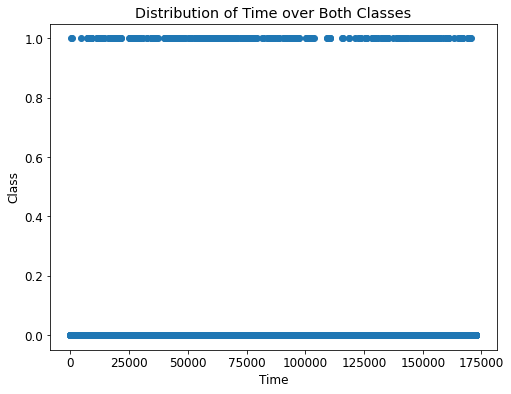

In [40]:
# Adjusting figuresize, and fontsize
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

# Adding titles to the plots and axes
plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

# Plotting the Time column vs. Class Column
plt.scatter(df["Time"],df["Class"])

There doesn't seem to be a differentiation between the two classes when it comes to time. The values are consistent for both classes.

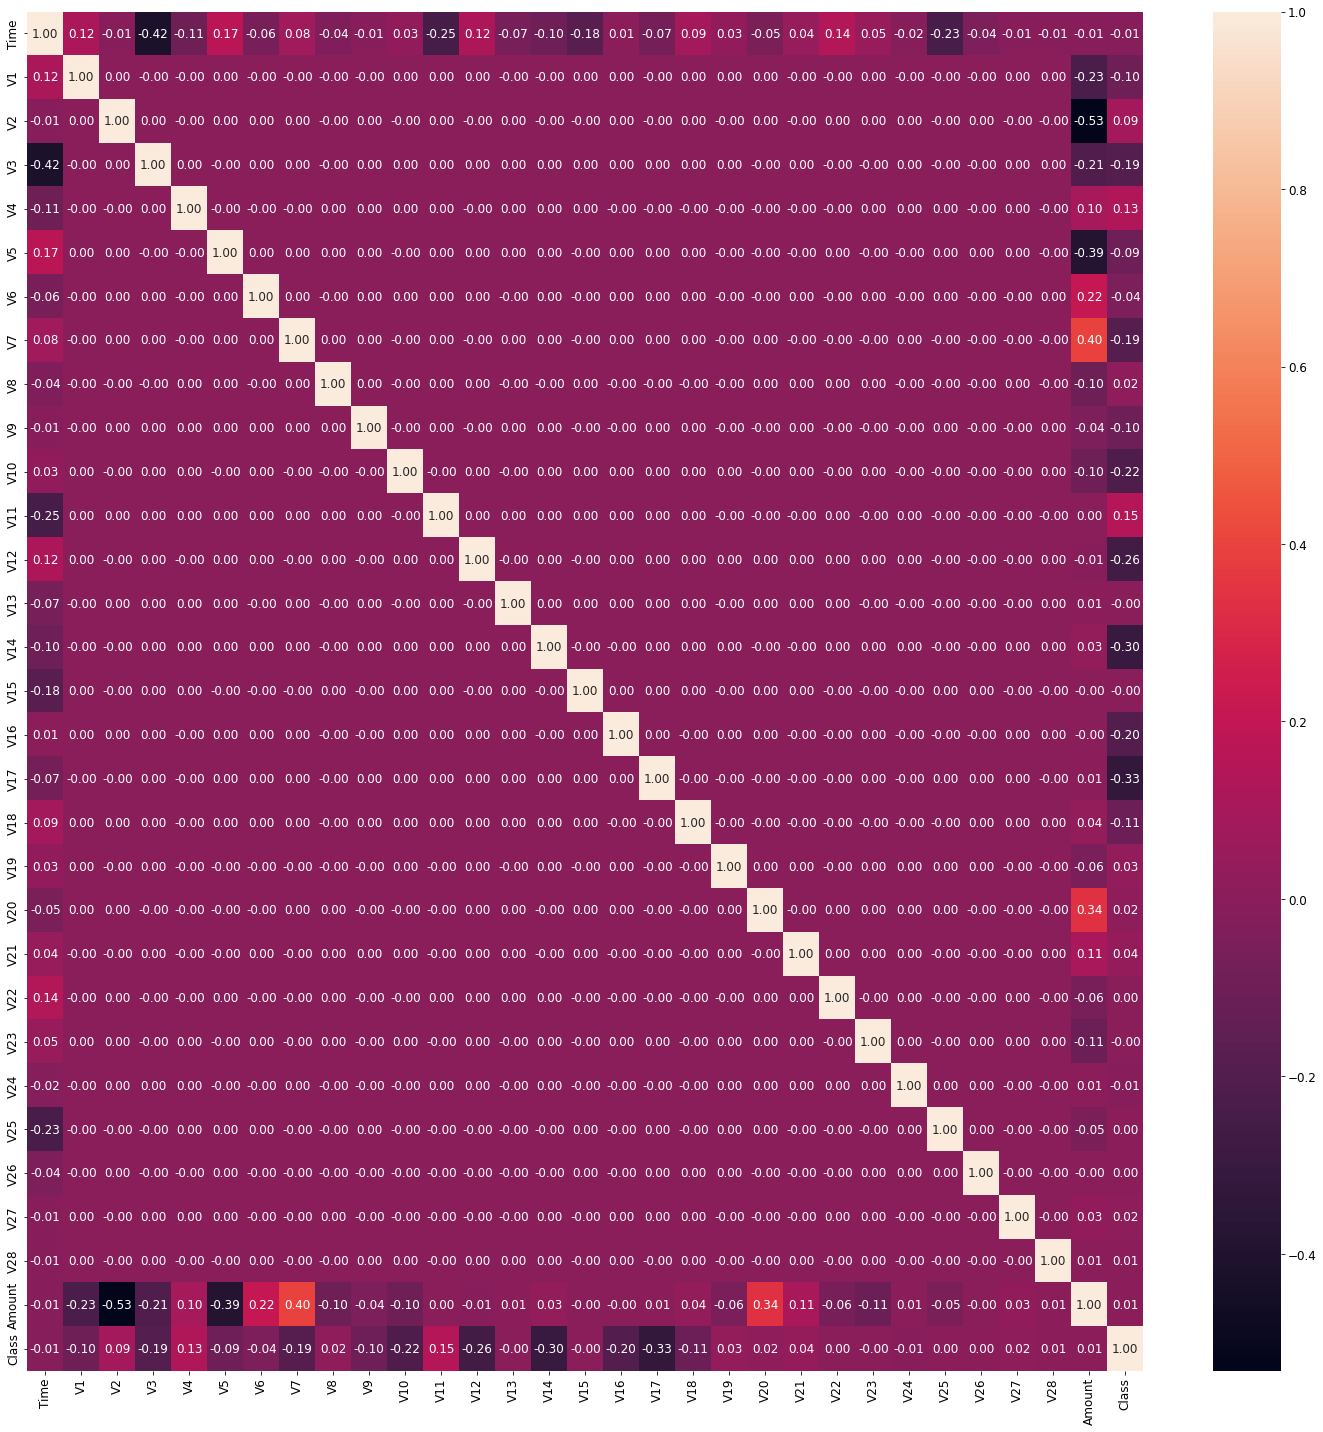

In [41]:
correlation = df.corr()
fig = plt.subplots(figsize=(25,25)) 
sns.heatmap(correlation, vmax= 1, annot=True, fmt='.2f')

We can see no major correlations between the features in this heatmap. Most correlations fall between -0.2 and 0.2, with some exceptions.

It is also of notice, the minimal relationship between the features and the target variable('Class'). The imbalanced nature of the data can downplay the importance of some features.



The time feature will not be needed to make classifications, and for this reason, we will drop the time feature.

We will split our data into two groups: training(70%) and testing(30%).

In [47]:
X = df.drop(["Class","Time"],axis=1).values 
y = df["Class"].values 


X_train_Before, X_test, y_train_Before, y_test = train_test_split(
    X, y, train_size = 0.7, 
    random_state=111)

Balancing the Data with Borderline-SMOTE

We will need to balance our data to ensure that the model has exposure to both classes. This ensures that the model won’t be biased towards the non-fraudulent values, as currently there are 284315 entries with a class of 0, and only 492 fraudulent values.

We will use a technique called Borderline_SMOTE(Borderline Synthetic Minority Oversampling Technique) to provide our model with as much data as possible. This technique takes synthetically generated data in between different elements in the minority class, while ignoring outliers. Outliers can be defined as features which neighbour more majority points, than minority ones.

We will only balance the training data, as the test series must reflect real-world field data.

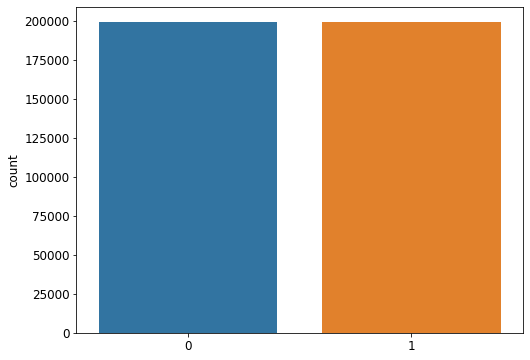

In [56]:
borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 42)
X_train, y_train = borderlineSMOTE.fit_resample(X_train_Before,y_train_Before)

sns.countplot(x=y_train)

Machine Learning Models

With a balanced dataset, we can build machine learning models for classification. Two models will be used:

    Random Forest
    Logistic Regression

It is important to define the performance metrics we will be using. As our validation data is imbalanced, if the model would predict the majority class every time, our model will receive an accuracy that is significantly skewed without consideration for the minority class. Hence, we will be using precision, recall, and F1 score.

Random Forest Model

15 estimators. 

In [57]:
#Random Forest Classifier

rf = RandomForestClassifier(n_estimators = 15,random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Precision:  83.02 %
Recall:  86.27 %
F1:  84.62 %


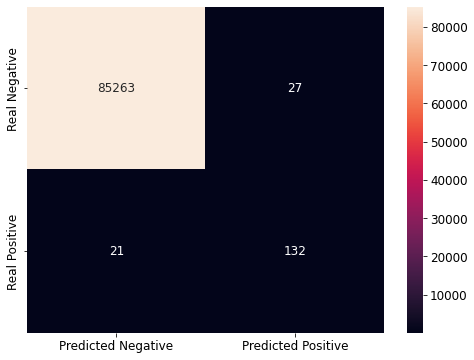

In [58]:
#Random Forest Classifier Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=["Real Negative","Real Positive"],xticklabels=["Predicted Negative", "Predicted Positive"])


print("Precision: ", round(precision*100,2),"%")
print("Recall: ", round(recall*100,2),"%")
print("F1: ", round(f1*100,2),"%")



The model had high precision and recall, meaning that it did not select as many false positives (precision) or false negatives (recall) as it did true positives. This also gave us a high F1 score.

Logistic Regression Model

Precision:  16.27 %
Recall:  92.81 %
F1:  27.68 %






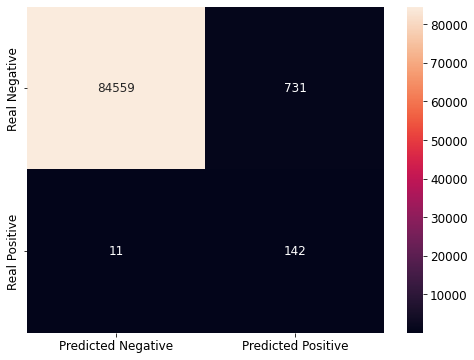

In [59]:
#Logistic Regression Classifier

logReg = LogisticRegression()

logReg.fit(X_train, y_train)

log_y_pred = logReg.predict(X_test)

log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1 = f1_score(y_test, log_y_pred)

print("Precision: ", round(log_precision*100,2),"%")
print("Recall: ", round(log_recall*100,2),"%")
print("F1: ", round(log_f1*100,2),"%")
print("\n"*3)

cm = confusion_matrix(y_test,log_y_pred)
sns.heatmap(cm,annot=True,fmt='g',yticklabels=["Real Negative","Real Positive"],xticklabels=["Predicted Negative", "Predicted Positive"])


In this case, while recall was high (model selected more true positives than false negatives), the precision was really low, which means that the model selected more false positives than true positives. Hence, the F1 score decreased.

In comparing these two models, it is important to evaluate the metrics by which we compare them. Our logistic regression model had a higher recall (by 6.54%), while the random forest classifier had a higher precision, (by 66.75%). In terms of F1 score, which is a harmonic mean of both precision and recall, the random forest model performed better.

Neural Network

We will also make a neural network with two hidden layers to solve this classification problem.

Before creating our model, it is important to define the hyperparameters that we will be using:

    An input layer of 64 neurons with ReLU activation
    Two dense hidden layers of 32 and 16 neurons respectively, each with a ReLU activation
    An output layer of 1 neuron with a sigmoid activation

Additionally, we have:

    An Adam optimizer with a learning rate of 1e-4 and a decay of 1e-6
    Loss of Binary Crossentropy and metrics of precision and recall

The model will be trained on 5 epochs

In [62]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model.fit(X_train, y_train, epochs = 10,\
                    validation_data = (X_test, y_test))

Epoch 1/10
12440/12440 [==============================] - 32s 2ms/step - loss: 0.1968 - precision: 0.9489 - recall: 0.9326 - val_loss: 0.0309 - val_precision: 0.1859 - val_recall: 0.9281
Epoch 2/10
12440/12440 [==============================] - 31s 2ms/step - loss: 0.0377 - precision: 0.9919 - recall: 0.9883 - val_loss: 0.0208 - val_precision: 0.3212 - val_recall: 0.9216
Epoch 3/10
12440/12440 [==============================] - 30s 2ms/step - loss: 0.0281 - precision: 0.9936 - recall: 0.9921 - val_loss: 0.0179 - val_precision: 0.3653 - val_recall: 0.8954
Epoch 4/10
12440/12440 [==============================] - 27s 2ms/step - loss: 0.0221 - precision: 0.9949 - recall: 0.9940 - val_loss: 0.0200 - val_precision: 0.2931 - val_recall: 0.9216
Epoch 5/10
12440/12440 [==============================] - 30s 2ms/step - loss: 0.0180 - precision: 0.9955 - recall: 0.9954 - val_loss: 0.0114 - val_precision: 0.5415 - val_recall: 0.8954
Epoch 6/10
12440/12440 [==============================] - 30s 2ms

Our validation precision ranged from approximately 22.10% to 62.10%, while the validation recall ranged from 88.89% to 92.16%. Epoch 4 had the best validation recall, and epoch 1 had the best validation precision. The model did not overfit, as the values for precision and recall are still increasing. Feel free to change the number of epochs to view how the model performs over greater periods of time! Do note however that it will take longer to train…

Machine Learning and Deep Learning bring speed and accuracy to the fight against credit card fraud as shown in this simple example. In 2019, Visa prevented an estimated $25 billion in credit card fraud with their AI systems. By harnessing the power of machine learning and deep learning, we can work towards combatting such instances of theft.